In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

In [57]:
plt.style.use('seaborn-v0_8')
plt.rc('figure', autolayout=True)
plt.rc('axes',
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=18)

def score_dataset(X, y, model=XGBRegressor()):
  for colname in X.select_dtypes(["category", "object"]):
    X[colname], _ = X[colname].factorize()

  score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
  score = -1 * score.mean()
  score = np.sqrt(score)
  return score


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bonus_house_prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
X = df.copy()
y = X.pop('SalePrice')
print(score_dataset(X, y))
X.select_dtypes(exclude=['object', "category"])

133.9637923330405


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,-1,0,0,0,...,0,0,-1,-1,-1,0,2,2008,0,0
1,2,20,0,80.0,9600,0,-1,0,0,0,...,0,0,-1,-1,-1,0,5,2007,0,0
2,3,60,0,68.0,11250,0,-1,1,0,0,...,0,0,-1,-1,-1,0,9,2008,0,0
3,4,70,0,60.0,9550,0,-1,1,0,0,...,0,0,-1,-1,-1,0,2,2006,0,1
4,5,60,0,84.0,14260,0,-1,1,0,0,...,0,0,-1,-1,-1,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,-1,0,0,0,...,0,0,-1,-1,-1,0,8,2007,0,0
1456,1457,20,0,85.0,13175,0,-1,0,0,0,...,0,0,-1,0,-1,0,2,2010,0,0
1457,1458,70,0,66.0,9042,0,-1,0,0,0,...,0,0,-1,2,0,2500,5,2010,0,0
1458,1459,20,0,68.0,9717,0,-1,0,0,0,...,0,0,-1,-1,-1,0,4,2010,0,0


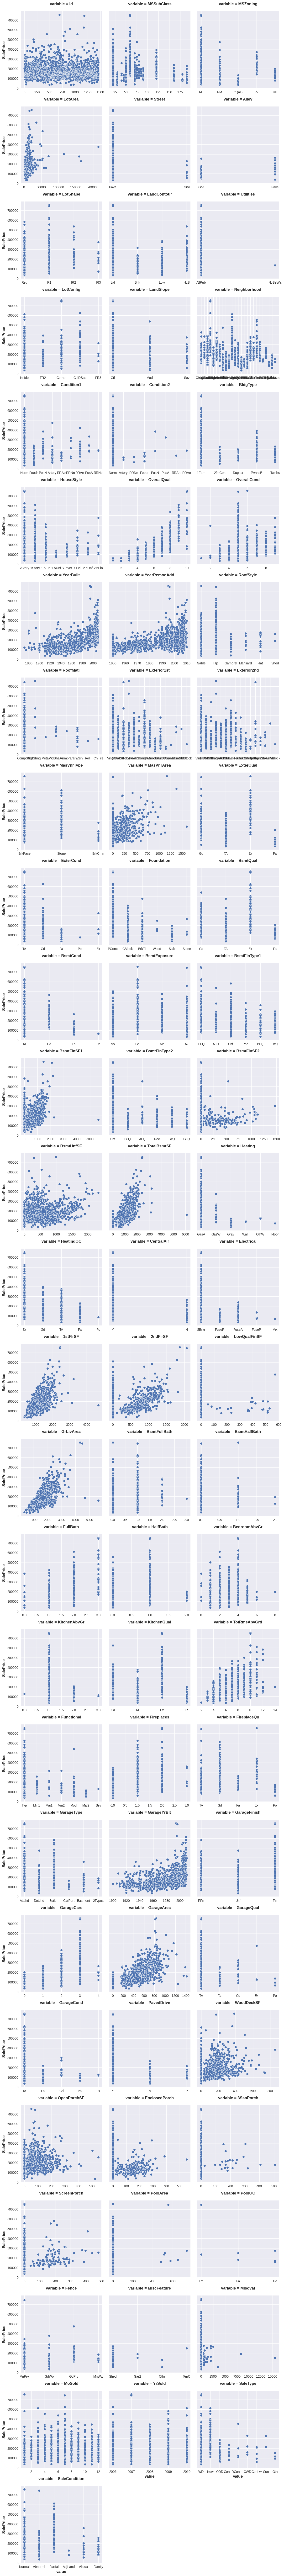

In [59]:
sns.relplot(
    x="value", y="SalePrice", col="variable", height=4, aspect=1, facet_kws={'sharex':False}, col_wrap=3,
    data=df.melt(
        id_vars=["LotFrontage", "SalePrice"],
        value_vars=X.select_dtypes(exclude=['object', "category"])))

In [60]:
features = ["GrLivArea", "1stFlrSF", "FullBath", "YearRemodAdd", "TotalBsmtSF", "YearBuilt", "OverallQual"]
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
X_scaled, y

(      GrLivArea  1stFlrSF  FullBath  YearRemodAdd  TotalBsmtSF  YearBuilt  \
 0      0.370207 -0.793162  0.789470      0.878367    -0.459145   1.050634   
 1     -0.482347  0.257052  0.789470     -0.429430     0.466305   0.156680   
 2      0.514836 -0.627611  0.789470      0.829930    -0.313261   0.984415   
 3      0.383528 -0.521555 -1.025689     -0.720051    -0.687089  -1.862993   
 4      1.298881 -0.045596  0.789470      0.733056     0.199611   0.951306   
 ...         ...       ...       ...           ...          ...        ...   
 1455   0.250316 -0.542249  0.789470      0.733056    -0.238040   0.918196   
 1456   1.061003  2.354894  0.789470      0.151813     1.104547   0.222899   
 1457   1.569110  0.065634  0.789470      1.023678     0.215567  -1.002149   
 1458  -0.832502 -0.218907 -1.025689      0.539309     0.046889  -0.704164   
 1459  -0.493765  0.241532 -1.025689     -0.962236     0.452629  -0.207523   
 
       OverallQual  
 0        0.651256  
 1       -0.071812  

In [61]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"]


score_dataset(X, y)
X["SalePrice"] = y

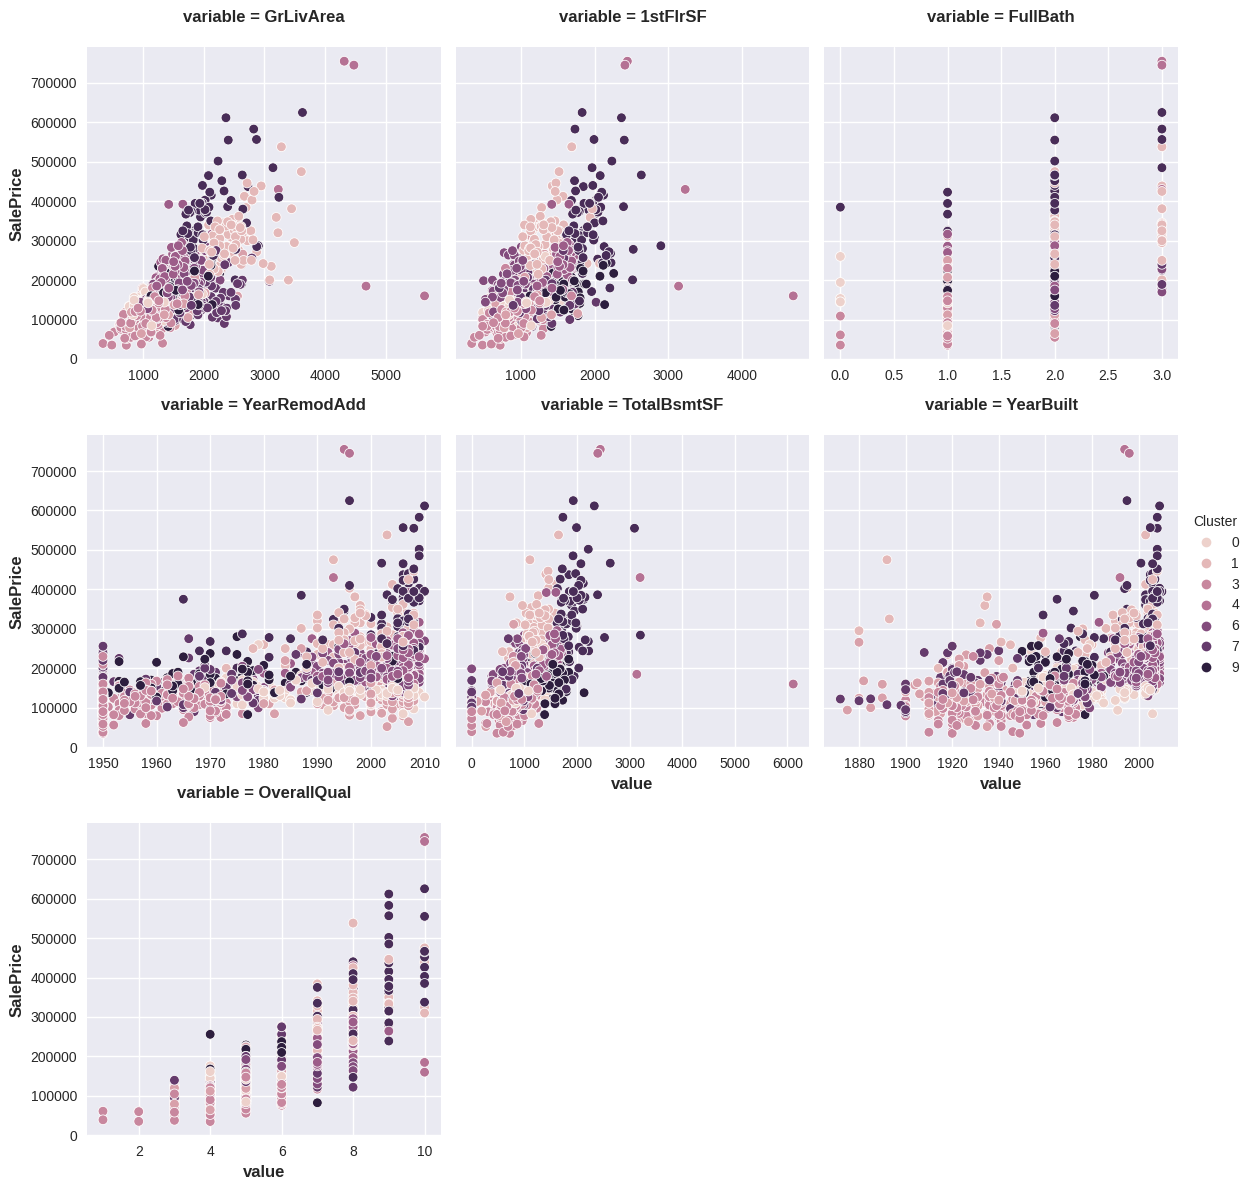

In [62]:
Xy = X.copy()
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable", height=4, aspect=1, facet_kws={'sharex':False}, col_wrap=3,
    data=Xy.melt(
        id_vars=["Cluster", "SalePrice"],
        value_vars=features))

In [63]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X_cd = kmeans.fit_transform(X_scaled)
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)
score_dataset(X, y)

np.float64(39.07687360551315)